# Generate random variates by inverting the CDF

## Abstract

In this example, we present how to generate random variates by inversion of the cumulated distribution function. In simplest situations, this method is rarely used in practice, both for reasons of performance, statistical quality of the generated random variates and numerical accuracy of the generated numbers when we use floating point numbers. However, it is an interesting method to know about because it is a building block for other algorithms and can be used to visualize the distibution of the generated numbers. 

## The Weibull distribution

Let $\beta>0$ and $\alpha>0$ be two real parameters: $\beta$ is a shape parameter and  $\alpha$ is a scale parameter.

The cumulated distribution function of the Weibull distribution is:

$$
F(x) = 1 - \exp\left(-\frac{x}{\alpha}\right)^\beta,
$$

for any $x\geq 0$.

In some situations, this parameters are denoted by $k=\beta$ and $\lambda=\alpha$.

The inverse of the CDF is:

$$
F^{-1}(x) = \alpha \left(-\log(1-p)\right)^{\frac{1}{\beta}}
$$

for any $x\geq 0$.

This is the *quantile* function, because it computes the quantile $F^{-1}(x)$ depending on an outcome $x$.

## Loss of accuracy when the probability is close to 1

In practice, if the probability $p$ is *very* close to 1, then the complementary probability $1-p$ is close to zero. This can lead to a significant loss of accuracy when we evaluate the subtraction $1-p$ with floating point numbers because $p$ and 1 have lots of common digits. This is called a *loss of accuracy by catastrophic cancellation*, a problem which is common in extreme events. 

We can use the $\textrm{expm1}$ function, defined by the equation:

$$
\textrm{expm1}(x) = \exp(x)-1,
$$

for any $x\in\mathbb{R}$.

The CDF is then:

$$
F(x) = -\textrm{expm1} \left(\left(-\frac{x}{\alpha}\right)^\beta\right),
$$

for any $x\geq 0$.

For the quantile function, we can use the $\textrm{log1p}$ function, defined by the equation:

$$
\textrm{log1p}(x) = \log(1+x)
$$

for any $x>-1$.

Therefore, the quantile function is:

$$
F^{-1}(x) = \alpha \left(-\textrm{log1p}(-p)\right)^{\frac{1}{\beta}}
$$

pour $x\geq 0$.

In the following, we will not use these robust equations and this issue will not be taken into account.

## Generate by inversion: histogram and density

In [1]:
import openturns as ot
import numpy as np

The following function defines the quantile function of the Weibull distribution. (Of course, we could use the `computeQuantile` method of the `Weibull` class as well. This would create a simpler example, but less interesting: this is a trade off that we accept in order to better understand the algorithm.)

In [2]:
def weibullQ(argument):
    p, alpha, beta = argument
    quantile = alpha*(-np.log1p(-p))**(1/beta)
    return [quantile]

In [3]:
quantileFunction = ot.PythonFunction(3, 1, weibullQ)

We define the parameters of the Weibull distribution and create the parametric function.

In [4]:
alpha = 1.0
beta = 10.

In [5]:
quantile = ot.ParametricFunction(quantileFunction,[1,2], [alpha,beta])
quantile

class=FunctionImplementation name=Unnamed description=[x0,y0] evaluationImplementation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,y0] evaluationImplementation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[1e-05,1e-05,1e-05] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[0.0001,0.0001,0.0001] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] parameters positions=[1,2] parameters=class=PointWithDescription name=Unnamed dimension=2 description=[x1,x2] values=[1,10] input positions=[0] gradientImplementation=class=ParametricGradient evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,y0] evaluationImplementation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[1e-05,1e-05,1e-05] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[0.0001,0.0001,0.0001] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] parameters positions=[1,2] parameters=class=PointWithDescription name=Unnamed dimension=2 description=[x1,x2] values=[1,10] input positions=[0] hessianImplementation=class=ParametricHessian evaluation=class=ParametricEvaluation function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,y0] evaluationImplementation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[1e-05,1e-05,1e-05] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[0.0001,0.0001,0.0001] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,y0] parameter=class=Point name=Unnamed dimension=0 values=[] parameters positions=[1,2] parameters=class=PointWithDescription name=Unnamed dimension=2 description=[x1,x2] values=[1,10] input positions=[0]

In the library, the uniform distribution is by default in the $[-1,1]$ interval. This is why we set the bounds from 0 to 1.

In [6]:
U = ot.Uniform(0.,1.)

Then we generate a sample with size 1000 of the uniform distribution.

In [7]:
n = 1000
uniformSample = U.getSample(n)

We generate the numbers by evaluating the quantile function on the uniform numbers.

In [8]:
weibullSample = quantile(uniformSample)

In order to compare the results, we use the `Weibull` class (using the default value of the location parameter $\gamma=0$).

In [9]:
W = ot.Weibull(alpha,beta)

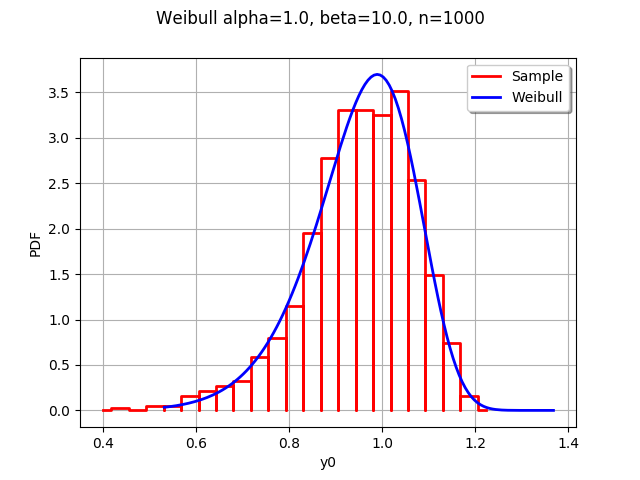

In [10]:
histo = ot.HistogramFactory().build(weibullSample).drawPDF()
histo.setTitle("Weibull alpha=%s, beta=%s, n=%d" % (alpha,beta,n))
histo.setLegends(["Sample"])
wpdf = W.drawPDF()
wpdf.setColors(["blue"])
wpdf.setLegends(["Weibull"])
histo.add(wpdf)
histo

We see that the empirical histogram of the generated outcomes is close to the exact density of the Weibull distribution.

## Visualization of the quantiles

We now want to see the details of the algorithm, by analysing the distribution of the uniform numbers compared with the distribution of the generated points.

In [11]:
n = 50
uniformSample = U.getSample(n)

In [12]:
weibullSample = quantile(uniformSample)

We sort the sample by increasing order. 

In [13]:
data = ot.Sample(n,2)
data[:,0] = weibullSample
data[:,1] = uniformSample
data.setDescription(["x","p"])

In [14]:
sample = ot.Sample(data.sort())
sample[0:5,:]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[x,p] data=[[0.615941,0.00782864],[0.673874,0.0191248],[0.719489,0.0364919],[0.736822,0.0460705],[0.741149,0.0487797]]

In [15]:
weibullSample = sample[:,0]
uniformSample = sample[:,1]

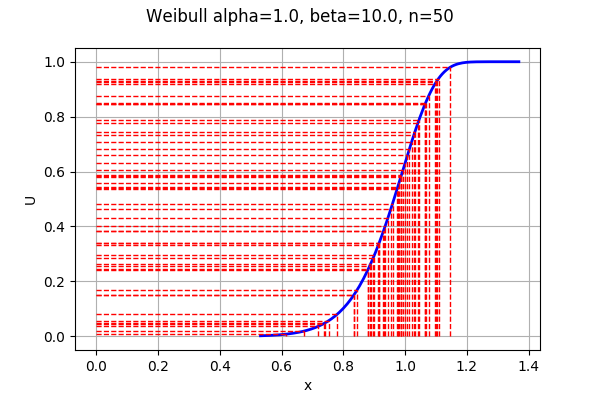

In [16]:
graph = ot.Graph("Weibull alpha=%s, beta=%s, n=%s" % (alpha,beta,n),"x","U",True)
# Add the CDF plot
curve = W.drawCDF()
curve.setColors(["blue"])
graph.add(curve)
# Add the horizontal lines
for i in range(n):
    curve = ot.Curve([0.,weibullSample[i,0]],[uniformSample[i,0],uniformSample[i,0]])
    curve.setColor("red")
    curve.setLineStyle("dashed")
    graph.add(curve)
# Add the vertical lines
for i in range(n):
    curve = ot.Curve([weibullSample[i,0],weibullSample[i,0]],[0.,uniformSample[i,0]])
    curve.setColor("red")
    curve.setLineStyle("dashed")
    graph.add(curve)
graph

This graphics must be read from the U axis on the left to the blue curve (representing the CDF), and down to the X axis. We see that the horizontal lines on the U axis have the uniform distribution. On the other hand, we see that the vertical lines (on the X axis) have the Weibull distribution. 